In [42]:
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

import cv2

#print the number of GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U40'), dtype('uint8')) -> None

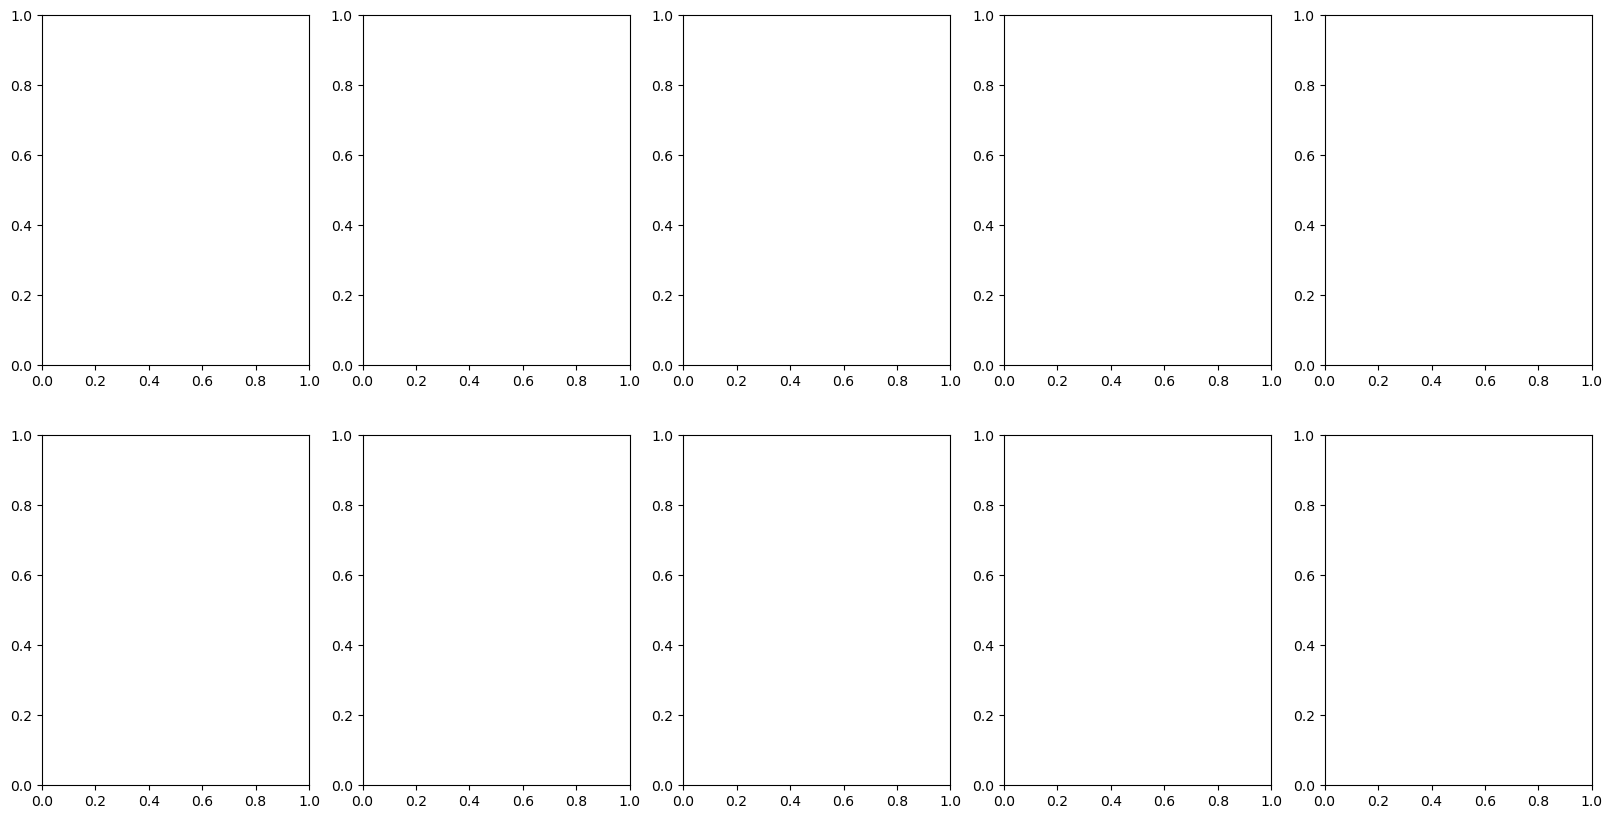

In [43]:
pathLFW = './LFW/lfw_funneled/'

#take the first 100 folders
folders = os.listdir(pathLFW)[:]

#the idea is to create a dataset for a siamese network. We have to create a list of tuples (image1, image2, label) where label is 1 if the two images are of the same person and 0 otherwise
#if there is a person with only one image, we discard use it for the training in the false case

#create a dictionary with the name of the person as key and the list of images as value
diz = {}
for folder in folders:
    #check if its actually a folder
    if not os.path.isdir(pathLFW + folder):
        continue
    #read the RGB images
    images = [cv2.imread(pathLFW + folder + '/' + img) for img in os.listdir(pathLFW + folder) if img.endswith('.jpg')]
    diz[folder] = images


#plot some images
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(plt.imread(pathLFW + folders[i*5+j] + '/' + diz[folders[i*5+j]][0]))
        ax[i][j].set_title(folders[i*5+j])
plt.show()

train_x = []
train_y = []


print('Number of people: ', len(diz))

firstPair = False


for nome in diz.keys():
    if len(diz[nome]) == 1:
        #print("ciao")
        if not firstPair:   #if it was already been found a person with only one image then we have created a tuple
            img1 = diz[nome][0]
            #resize the image into a 160x160 image

            img1 = tf.image.resize(img1, (160, 160))


            firstPair = True
            
        else:
            img2 = diz[nome][0]
            #resize the image into a 160x160 image
            img2 = tf.image.resize(img2, (160, 160))
            tupla = (img1, img2)
            train_x.append(tupla)
            train_y.append(0)
            firstPair = False
    else:
        #print("ciao2")
        #create a for with step 2
        for i in range(0, len(diz[nome]), 2):
            #check if i + 1 is out of range
            if i + 1 >= len(diz[nome]):
                if not firstPair:   #if it was already been found a person with only one image then we have created a tuple
                    img1 = diz[nome][i]
                    img1 = tf.image.resize(img1, (160, 160))
                    firstPair = True
                    
                else:
                    img2 = diz[nome][i]
                    img2 = tf.image.resize(img2, (160, 160))
                    tupla = (img1, img2)
                    train_x.append(tupla)
                    train_y.append(0)
                    firstPair = False
                continue
            img1 = diz[nome][i]
            img1 = tf.image.resize(img1, (160, 160))

            img2 = diz[nome][i+1]
            img2 = tf.image.resize(img2, (160, 160))
            tupla = (img1, img2)
            train_x.append(tupla)
            train_y.append(1)


#train x in a numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)



            

    



In [ ]:
from keras_facenet import FaceNet

embedder = FaceNet()

embeddings = embedder.embeddings(train_x)